Used pandas for analyse and import the active fire data

In [1]:
import pandas as pd
import numpy as np

In [2]:
firedata = pd.read_excel(r'/Users/Prairtyy/Downloads/Fire_data.xlsx')

In [3]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


Create new column to avoid overwrite 

In [4]:
firedata['NEWTIME'] = firedata['ACQ_TIME']

Add zero in front of the time

In [5]:
firedata['NEWTIME'] = firedata['NEWTIME'].astype(str).str.zfill(4) 

Insert : between hour and minute 

In [6]:
firedata['NEWTIME'] = firedata['NEWTIME'].str.slice(stop=2)+':'+firedata['NEWTIME'].str.slice(start=2)

In [7]:
firedata['NEWTIME'] = pd.to_datetime(firedata['ACQ_DATE'].astype(str)+' '+firedata['NEWTIME'])

In [8]:
firedata.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
NEWTIME       datetime64[ns]
dtype: object

Convert time to number. Firstly, convert time to unix epoch time

In [9]:
firedata['UNIXTIME'] = pd.to_datetime(firedata['NEWTIME'] ,unit='s' ,origin='unix').astype(int)/10**10

In [10]:
minunixtime = firedata['UNIXTIME'].min()

In [11]:
firedata['UNIXTIME'] = firedata['UNIXTIME']-minunixtime

In [12]:
firedata['UNIXTIME']

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
79229    1084848.0
79230    1084848.0
79231    1084848.0
79232    1084848.0
79233    1084848.0
Name: UNIXTIME, Length: 79234, dtype: float64

In [13]:
firedata[["LATITUDE","LONGITUDE","UNIXTIME"]]

,LATITUDE,LONGITUDE,UNIXTIME
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
79229,17.81812,97.74127,1084848.0
79230,17.77545,97.85637,1084848.0
79231,17.76847,97.79116,1084848.0
79232,17.77518,97.82606,1084848.0


In [14]:
activefiredata = firedata[["LATITUDE","LONGITUDE","UNIXTIME"]]

Create Active fire data

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Set up figure size and DPI for screen demo

In [16]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=120

Make a Axes3D

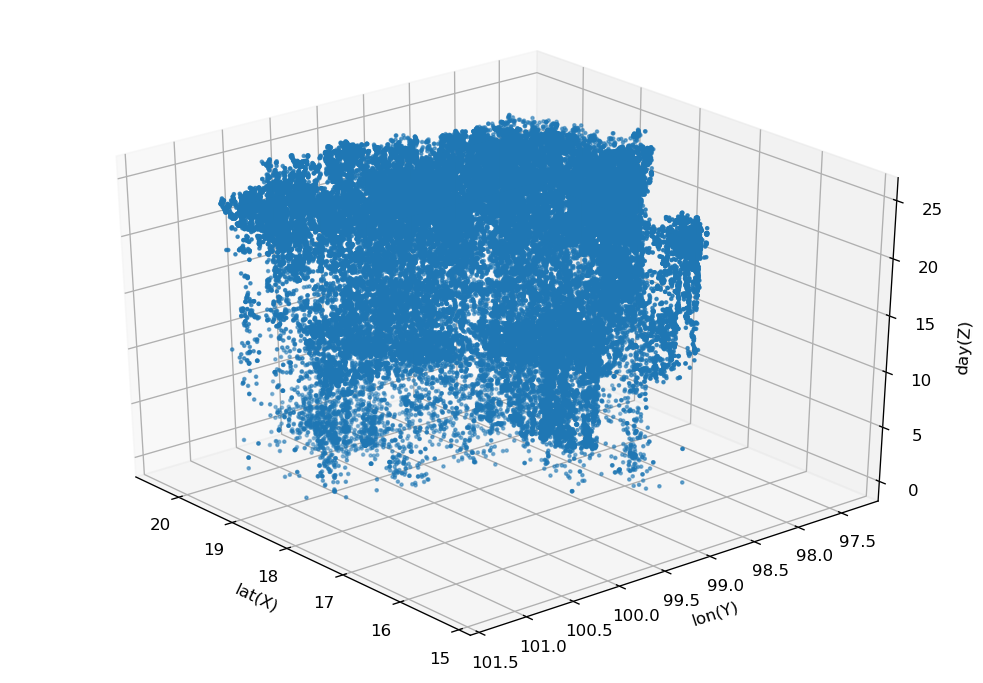

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(activefiredata['LATITUDE'], activefiredata['LONGITUDE'], activefiredata['UNIXTIME']/43200, s=3)
ax.view_init(azim=140)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('day(Z)')
plt.show()

Convert Lat Lon to UTM

In [18]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pyproj
from pyproj import Proj

In [20]:
lat = firedata[["LATITUDE"]]
LAT = lat.to_numpy()

In [21]:
lon = firedata[["LONGITUDE"]]
LON = lon.to_numpy()

In [22]:
myProj = Proj("+proj=utm +zone=47N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [23]:
UTMx,UTMy = myProj(LON, LAT) 
UTMx,UTMy

(array([[468103.08169441],
        [472209.15950364],
        [507319.39965694],
        ...,
        [371855.27522493],
        [375559.97157386],
        [388713.56669191]]),
 array([[1806231.98175182],
        [1823051.63118714],
        [1872444.25650694],
        ...,
        [1964982.84508514],
        [1965701.84110746],
        [2042251.15574941]]))

In [24]:
Latitude = pd.DataFrame(UTMy,columns=['LATITUDE'])

In [25]:
time = firedata['UNIXTIME']

In [26]:
DAY = time.to_numpy()

In [27]:
newdata = pd.DataFrame(np.c_[UTMy, UTMx, DAY], columns=['LATITUDE', 'LONGTITUDE','DAY'])
newdata

,LATITUDE,LONGTITUDE,DAY
0,1.806232e+06,468103.081694,0.0
1,1.823052e+06,472209.159504,0.0
2,1.872444e+06,507319.399657,0.0
3,1.828813e+06,457180.335393,0.0
4,1.865734e+06,460826.166829,0.0
...,...,...,...
79229,1.970512e+06,366602.824369,1084848.0
79230,1.965712e+06,378773.429489,1084848.0
79231,1.964983e+06,371855.275225,1084848.0
79232,1.965702e+06,375559.971574,1084848.0


In [28]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=120

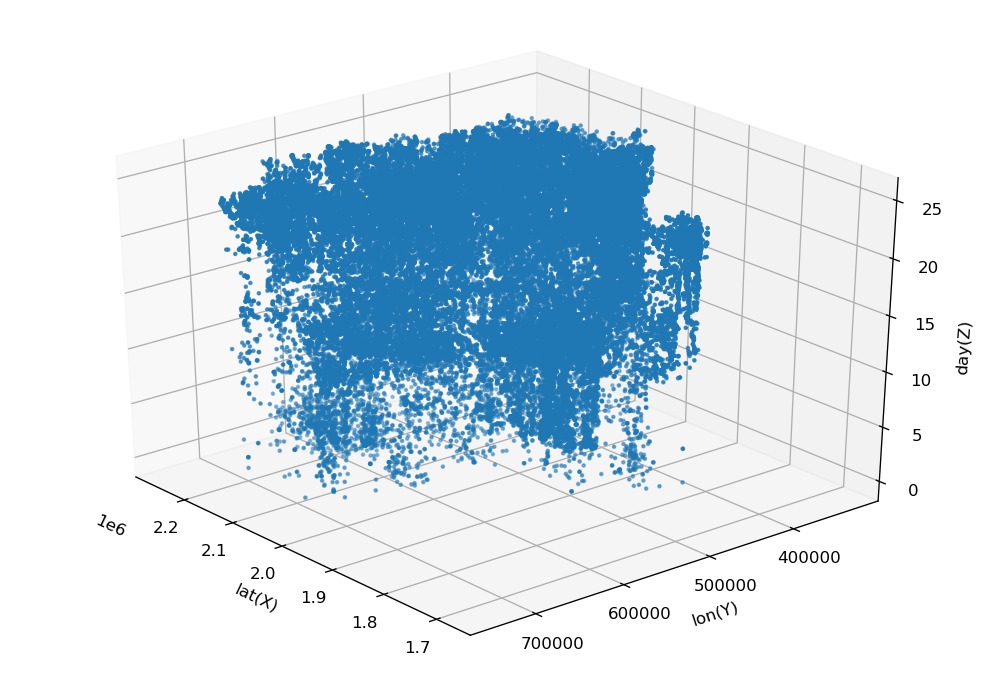

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(newdata['LATITUDE'], newdata['LONGTITUDE'], newdata['DAY']/43200, s=3)
ax.view_init(azim=140)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('day(Z)')
plt.show()

In [30]:
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [43]:
model = DBSCAN(eps=0.01, min_samples=2)
model.fit_predict(newdata)
pred = model.fit_predict(newdata)
labels = model.labels_
n_noise_ = list(labels).count(2)

In [41]:
print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(newdata, labels))

number of cluster found: 1
cluster for each point:  [-1 -1 -1 ... -1 -1 -1]
Estimated number of noise points: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)